In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD


from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\DL_Assignments\Multiple CSV\2.concerticcir1.csv",header = None)

In [4]:
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [5]:
x = df.iloc[:,0:2]
y = df.iloc[:,2].astype(int)

In [ ]:
x.shape

(100, 2)

In [ ]:
y.shape

(100,)

<Axes: xlabel='0', ylabel='1'>

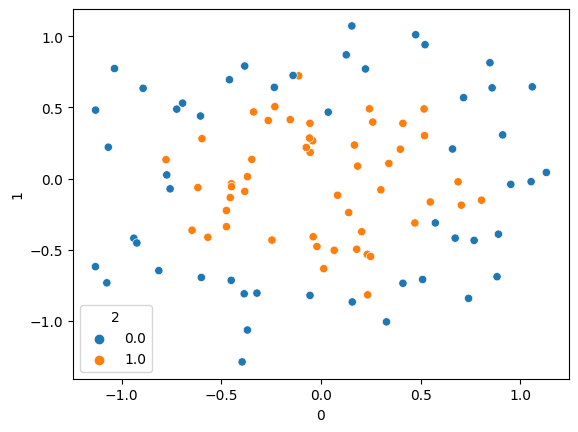

In [ ]:
sns.scatterplot(data = df, x=0,y=1, hue = 2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(90, 2) (10, 2) (90,) (10,)


In [ ]:
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [ ]:
model=Sequential()
model.add(Dense(16,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(8,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(4,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                48        
                                                                 
 dense_21 (Dense)            (None, 10)                170       
                                                                 
 dense_22 (Dense)            (None, 8)                 88        
                                                                 
 dense_23 (Dense)            (None, 4)                 36        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 347 (1.36 KB)
Trainable params: 347 (1.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])

history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 2s 31ms/step - loss: 0.7805 - accuracy: 0.4815 - val_loss: 0.7842 - val_accuracy: 0.4444
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.7312 - accuracy: 0.5185 - val_loss: 0.6686 - val_accuracy: 0.5556
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.7132 - accuracy: 0.5679 - val_loss: 0.7019 - val_accuracy: 0.5556
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6792 - accuracy: 0.6420 - val_loss: 0.7023 - val_accuracy: 0.4444
Epoch 5/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.7160 - val_loss: 0.7231 - val_accuracy: 0.5556
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.7160 - val_loss: 0.7516 - val_accuracy: 0.4444
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6009 - accuracy: 0.7778 - val_loss: 0.6824 - val_accuracy: 0.5556
Epoch 8/20
17/17 [=

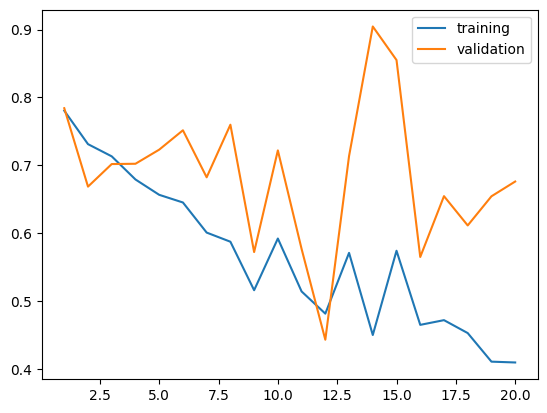

In [ ]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

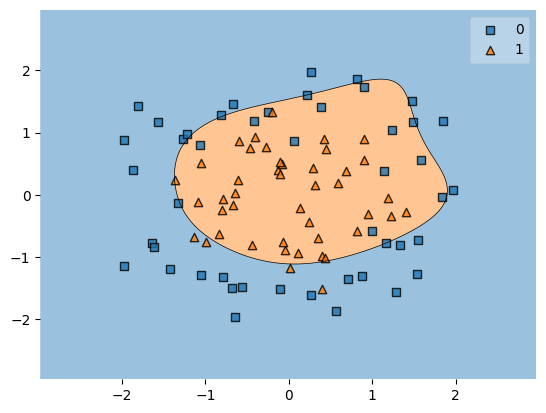

In [ ]:
plot_decision_regions(x_trainp,y_train.values,clf=model)